In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.model_selection import train_test_split
from google.colab import drive
from PIL import Image

In [0]:
#drive.mount('/content/drive')

In [0]:
#path = "./drive/My Drive/cancer_mnist"
#img = os.listdir(path)                        # shows all the 10015 images
#print (len(img))

In [2]:
#URL = "https://drive.google.com/drive/my-drive/cancer_mnist"
URL = "https://storage.googleapis.com/zipp_cancer_mnist/c_mnist.zip"
zip_dir = tf.keras.utils.get_file('c_mnist.zip', origin=URL, extract = True)

2771894272/2771886456 [==============================] - 51s 0us/step


In [0]:
zip_dir_base = os.path.dirname(zip_dir)

In [4]:
zip_dir_base

'/root/.keras/datasets'

In [5]:
!ls /root/.keras/datasets

'cancer_mnist - Copy'   c_mnist.zip


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cancer_mnist - Copy')

In [7]:
os.listdir(base_dir)                 # outputs a list of all 10015 the files 
print (len(os.listdir(base_dir))) 

10015


In [9]:
info = pd.read_csv("HAM10000_metadata.tab", sep="\t")
info.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [10]:
print (set(info.dx))
l = len(set(info.dx))

{'vasc', 'mel', 'bkl', 'bcc', 'nv', 'akiec', 'df'}


In [0]:
for i in set(info.dx):
  if not os.path.exists(base_dir + "/" + i):
    os.makedirs(base_dir + "/" + i)

In [12]:
len(os.listdir(base_dir))    # 10015 files and 7 folders = 10022

10022

In [0]:
info.image_id = info.image_id + ".jpg"

In [14]:
info.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419.jpg,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030.jpg,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769.jpg,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661.jpg,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633.jpg,bkl,histo,75.0,male,ear


In [15]:
len(set(info.image_id))

10015

In [0]:
for i in set(info.dx):
  source = base_dir
  dest = base_dir + "/" + i
  for file in os.listdir(base_dir):
    if (file.endswith(".jpg") and (info.dx.loc[info.image_id == file] == i).item()):
      shutil.move(source + "/" + file, dest)

In [17]:
os.listdir(base_dir)

['akiec', 'df', 'bcc', 'vasc', 'bkl', 'nv', 'mel']

In [18]:
for i in set(info.dx):
  print (i + "   " + str(len(os.listdir(base_dir + "/" + i))))


vasc   142
mel   1113
bkl   1099
bcc   514
nv   6705
akiec   327
df   115


In [19]:
info.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [0]:
for i in set(info.dx):
  if not os.path.exists(base_dir + "/" + "train" + "/" + i):
    os.makedirs(base_dir + "/" + "train" + "/" + i)
for i in set(info.dx):
  if not os.path.exists(base_dir + "/" + "val" + "/" + i):
    os.makedirs(base_dir + "/" + "val" + "/" + i)

In [21]:
os.listdir(base_dir)

['akiec', 'df', 'bcc', 'val', 'vasc', 'train', 'bkl', 'nv', 'mel']

In [22]:
os.listdir(base_dir + "/" + "train")

['akiec', 'df', 'bcc', 'vasc', 'bkl', 'nv', 'mel']

In [0]:
for i in set(info.dx):
  source = base_dir + "/" + i
  dest_train = base_dir + "/" + "train" + "/" + i
  l = len(os.listdir(source))
  sel_l = int(np.ceil(0.8*l))
  selected_train_files = np.random.permutation(os.listdir(source))[0:sel_l]
  for f in selected_train_files:
    shutil.move(source + "/" + f, dest_train)

In [0]:
for i in set(info.dx):
  source = base_dir + "/" + i
  dest_val = base_dir + "/" + "val" + "/" + i
  for f in os.listdir(source):
     shutil.move(source + "/" + f,dest_val) 

In [25]:
len(os.listdir(base_dir + "/" + "train" + "/" + "df"))     #92 out of 117 = 0.79

92

In [26]:
len(os.listdir(base_dir + "/" + "val" + "/" + "mel"))     #222 out of 1113 = 0.2

222

In [0]:
train_dir = os.path.join(base_dir, "train")
val_data = os.path.join(base_dir, "val")

In [0]:
batch_size = 100
IMG_2 = 600
IMG_1 = 450

In [29]:
image_gen_train = ImageDataGenerator(rescale=1./255, rotation_range = 45, horizontal_flip = True)
train_data_gen = image_gen_train.flow_from_directory(directory = train_dir, target_size = (IMG_1,IMG_2), batch_size=batch_size, class_mode = "sparse")

image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(directory = val_data, target_size = (IMG_1,IMG_2), batch_size=batch_size, class_mode = "sparse")

Found 8015 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.


In [0]:
train_data_gen[0]            # tuple of all 100 batches

In [40]:
train_data_gen[0][0].shape   # first batch of 100 images and its labels

(100, 450, 600, 3)

In [41]:
train_data_gen[0][0][20].shape  # a single image

(450, 600, 3)

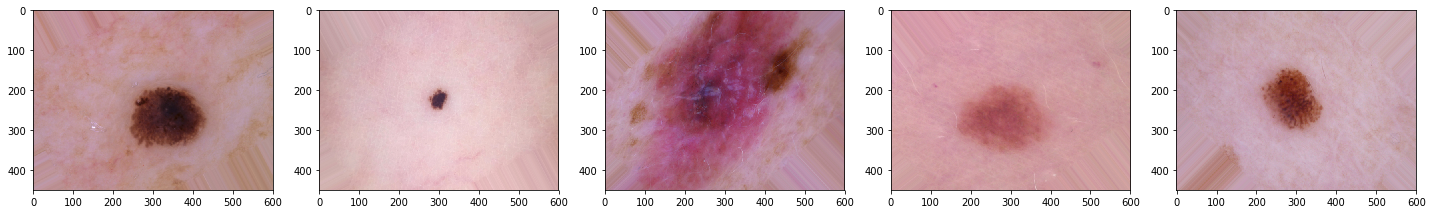

In [44]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    #axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
random_images = [train_data_gen[20][0][i] for i in range(5)]
plotImages(random_images)

In [31]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape = (IMG_1, IMG_2, 3),padding="same"),
                                   tf.keras.layers.MaxPool2D(2,2),
    
                                   #tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape = (IMG_SHAPE, IMG_SHAPE, 3)),
                                   tf.keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"),
                                   tf.keras.layers.MaxPool2D(2,2),
    
                                   #tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape = (IMG_SHAPE, IMG_SHAPE, 3)),
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
                                   tf.keras.layers.MaxPool2D(2,2),
    
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = "relu"),
                                   tf.keras.layers.Dense(7, activation = "softmax")
                                 ])

W0719 16:10:30.313793 140399733655424 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 450, 600, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 225, 300, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 225, 300, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 75, 64)        0

In [0]:
model.compile(optimizer = "adam", loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

In [0]:
epochs = 5

#history = model.fit_generator(generator=train_data_gen,  epochs = epochs, validation_data = val_data_gen)

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    #steps_per_epoch=20,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
    #validation_steps = 20
)

Epoch 1/5
10/81 [==>...........................] - ETA: 47:20 - loss: 12.0890 - acc: 0.4010

W0719 02:12:25.528147 140615620392832 legend.py:1289] No handles with labels found to put in legend.


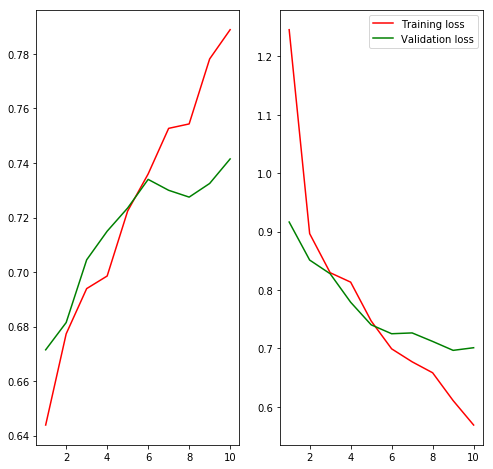

In [146]:
fig,ax = plt.subplots(1,2,figsize=(8,8),sharey=False)
x = np.linspace(1,epochs,epochs)
ax[0].plot(x,history.history["acc"],c="r",label="Training accuracy")
ax[0].plot(x,history.history["val_acc"],c="g",label="Validation accuracy")
plt.legend(loc = "best")
ax[1].plot(x,history.history["loss"],c="r",label="Training loss")
ax[1].plot(x,history.history["val_loss"],c="g",label="Validation loss")
plt.legend(loc = "best")
plt.show()